In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customer_merchandise_dataset.csv')
df.head()

,Age,Gender,Watch_Time_Per_Day,Subscription_Status,Previous_Purchase,Engagement_Level,Will_Buy
0,49,Male,90,Yes,No,Medium,No
1,19,Female,89,Yes,No,Low,No
2,28,Female,69,Yes,Yes,Medium,Yes
3,44,Female,51,No,No,Medium,No
4,34,Male,14,Yes,Yes,Medium,Yes


In [4]:
df.describe()

,Age,Watch_Time_Per_Day
count,1000.000000,1000.000000
mean,31.878000,88.609000
std,10.893199,50.751175
min,13.000000,5.000000
25%,23.000000,45.000000
50%,33.000000,84.500000
75%,41.000000,132.000000
max,50.000000,180.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1000 non-null   int64 
 1   Gender               1000 non-null   object
 2   Watch_Time_Per_Day   1000 non-null   int64 
 3   Subscription_Status  1000 non-null   object
 4   Previous_Purchase    1000 non-null   object
 5   Engagement_Level     1000 non-null   object
 6   Will_Buy             1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [6]:
df.duplicated().sum()

np.int64(3)

In [7]:
df.drop_duplicates(inplace=True)

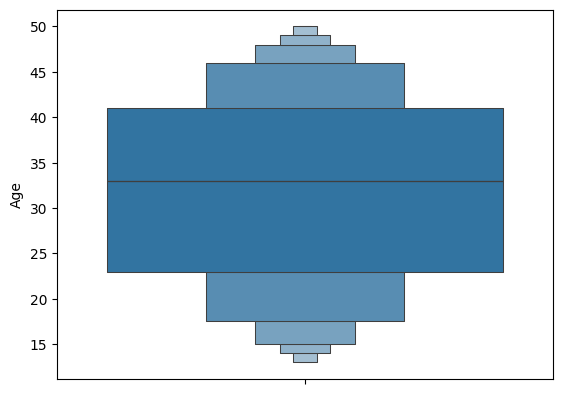

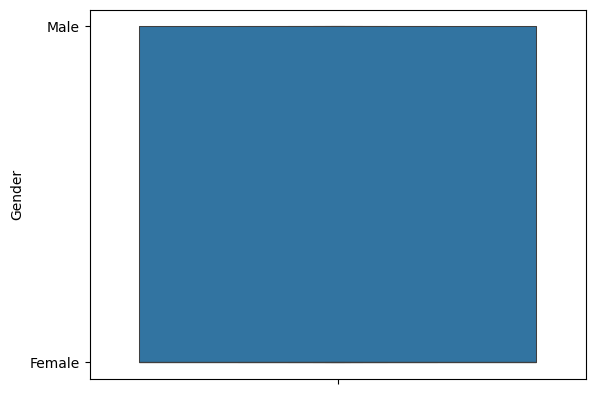

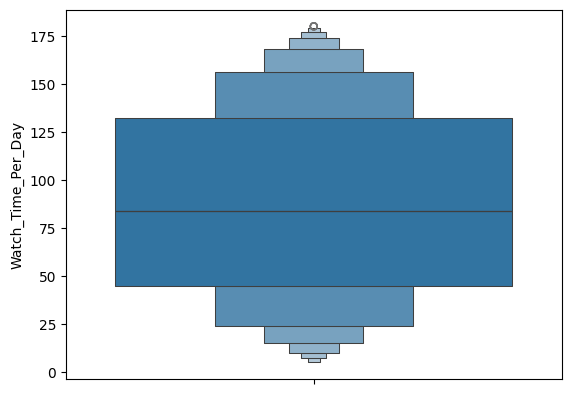

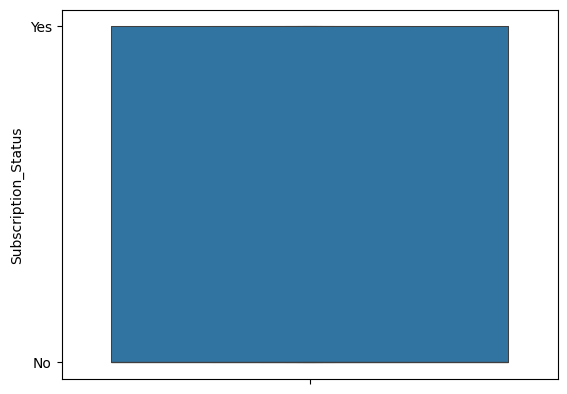

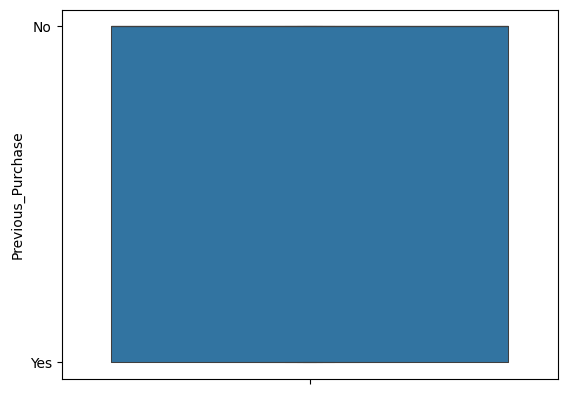

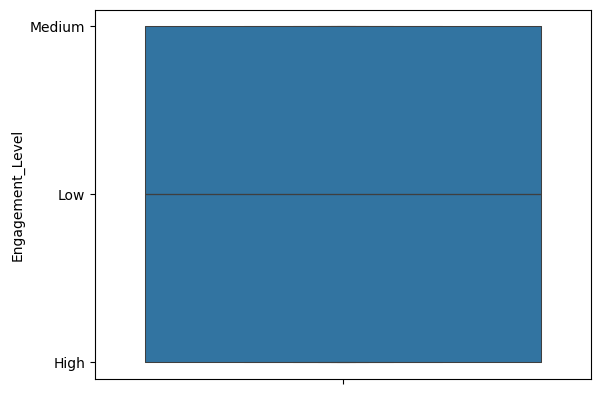

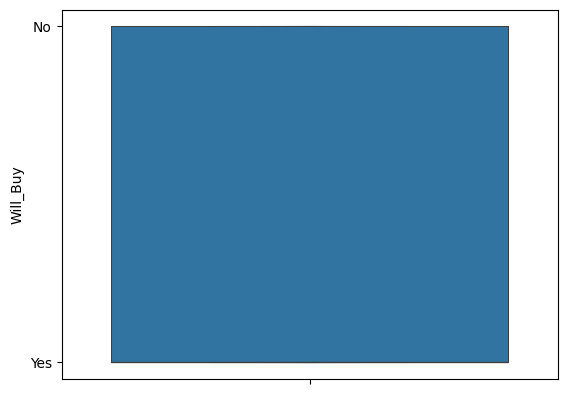

In [8]:
for col in df.columns:
    sns.boxenplot(df[col])
    plt.show()

In [9]:
cat_col = df.select_dtypes(include='object')

mapping = {}
for col in cat_col:
    unique = cat_col[col].unique()
    unique_label = {label : idx for idx, label in enumerate(unique)}
    mapping[col] = unique_label
    df[col] = cat_col[col].map(unique_label)

In [10]:
mapping

{'Gender': {'Male': 0, 'Female': 1},
 'Subscription_Status': {'Yes': 0, 'No': 1},
 'Previous_Purchase': {'No': 0, 'Yes': 1},
 'Engagement_Level': {'Medium': 0, 'Low': 1, 'High': 2},
 'Will_Buy': {'No': 0, 'Yes': 1}}

In [11]:
df.head()

,Age,Gender,Watch_Time_Per_Day,Subscription_Status,Previous_Purchase,Engagement_Level,Will_Buy
0,49,0,90,0,0,0,0
1,19,1,89,0,0,1,0
2,28,1,69,0,1,0,1
3,44,1,51,1,0,0,0
4,34,0,14,0,1,0,1


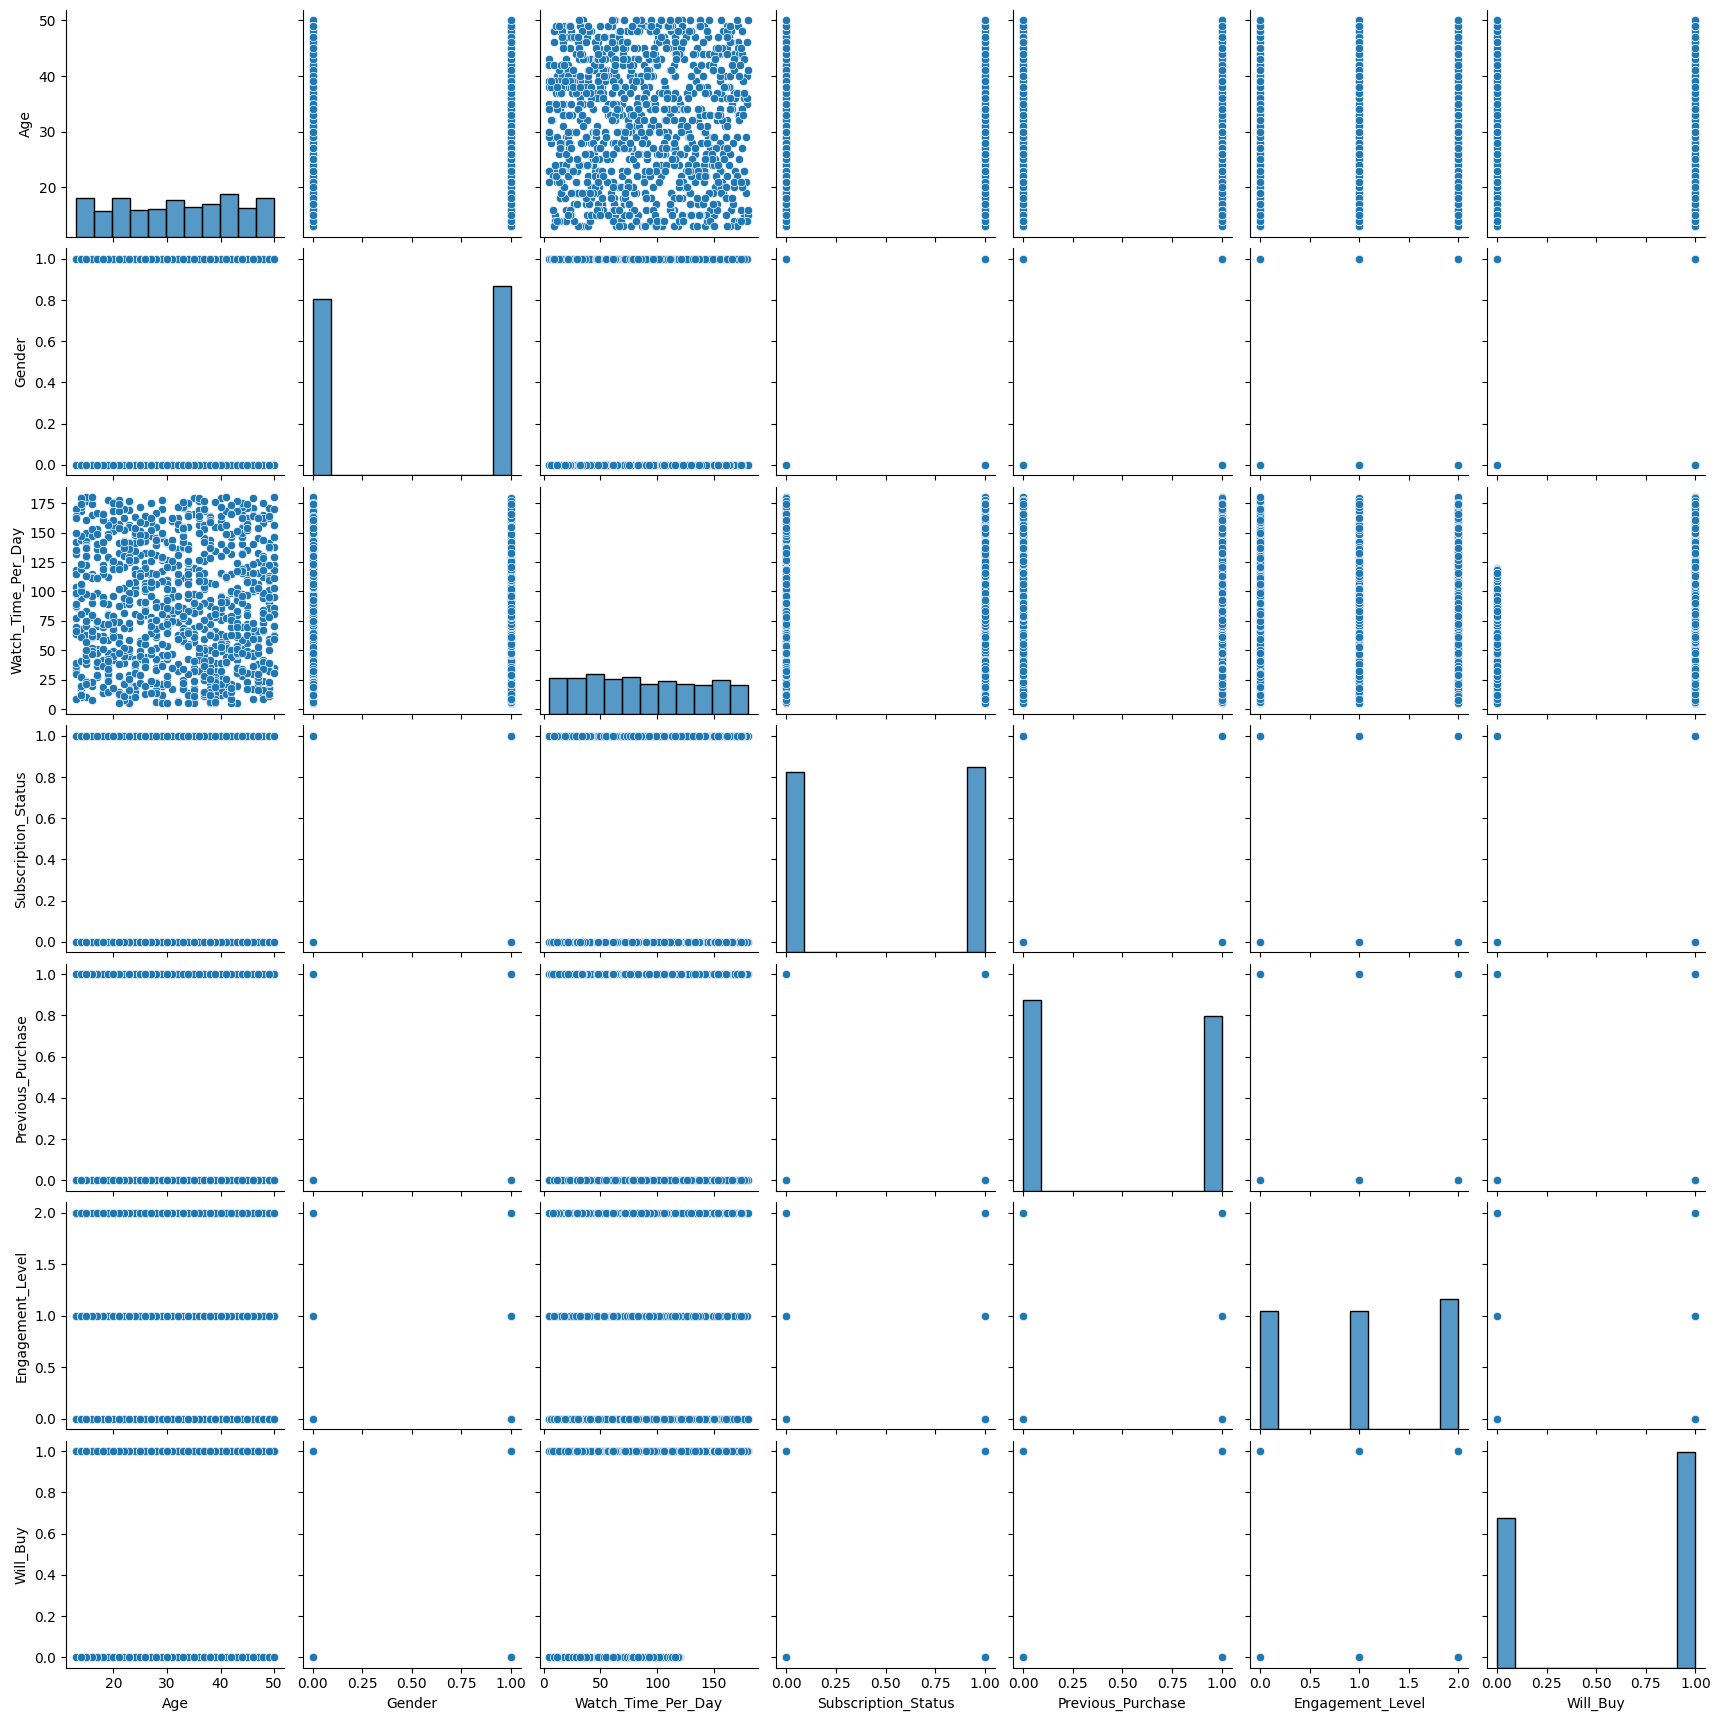

In [12]:
sns.pairplot(df)
plt.show()

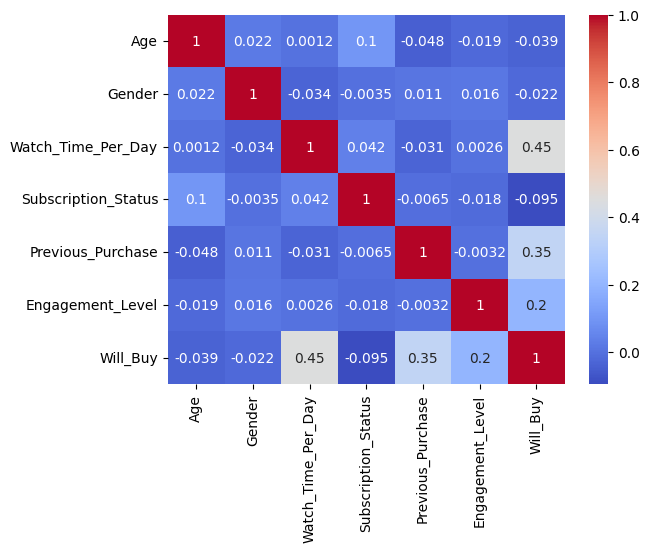

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [13]:
df['Will_Buy'].value_counts()

Will_Buy
1    589
0    408
Name: count, dtype: int64

In [14]:
x = df.drop(columns='Will_Buy')
y = df['Will_Buy']

In [15]:
y

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Will_Buy, Length: 997, dtype: int64

In [16]:
def strat(x,y, train_size=0.8):
    np.random.seed(42)
    yidx = {}
    for i, label in enumerate(y):
        if label not in yidx:
            yidx[label] = [i]
        else:
            yidx[label].append(i)
            
    tridx = []
    teidx = []
    
    for i, label in yidx.items():
        shuffle=(np.random.permutation(label))
        train = max(1, int(len(shuffle) * train_size))
        tridx.extend(shuffle[:train])
        teidx.extend(shuffle[train:])
        
    xtr = x.iloc[tridx].reset_index(drop=True)
    xte = x.iloc[teidx].reset_index(drop=True)
    ytr = y.iloc[tridx].reset_index(drop=True)
    yte = y.iloc[teidx].reset_index(drop=True)
    return xtr,xte,ytr,yte

x_train,x_test,y_train,y_test = strat(x,y,train_size=0.8)

In [17]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(797, 6) (200, 6) (797,) (200,)


In [18]:
def minmaxscaler(_xtr):
    maxi = _xtr.max()
    minim = _xtr.min()
    norm = (_xtr - minim) / (maxi - minim)
    return norm, maxi,minim

x_train_norm ,maxi,minim = minmaxscaler(x_train)

x_test_norm = (x_test - minim) / (maxi - minim)